
# **[2023-1] Image Processing & Vision (55397)**

* ### Hak Gu Kim
* ### Assistant Professor
* ### Graduate School of Advanced Imaging Science, Multimedia & Film (GSAIM)
* ### Chung-Ang University
* ### Webpage: www.irislab.cau.ac.kr


# **Homework II: Edge Detection**

* ### **Deadline:** 12 April (Wed) at 11:59pm
* ### **Submission:** Upload the zip file to "과제 및 평가" on E-class
  * **Upload zip file:** ipv23_hw02-student number.zip
    * **Python code:** ipv23_hw02-student number.ipynb
    * **Report:** ipv23_hw02-student number.pdf  (page limit: 4 pages)
  

## **[Homework II-0]** Environmental Setting

In [1]:
# Connect to the google drive #

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
# Import the required libraries for image processing

import sys
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math

# Define the directory
dir = '/content/gdrive/My Drive/Colab Notebooks/IPV23_HW2/test imgs/' # File path

In [3]:
# Define the functions for the load and save the input image

def loadImg(in_fname):
  img = cv2.imread(dir + in_fname)

  if img is None:
    print('Image load failed!')
    sys.exit()

  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title("Input RGB Image")
  plt.show()

  return img  

## Save image file
def saveImg(out_img, out_fname):
  cv2.imwrite(dir + out_fname, out_img)

## **[Homework II-1]** Implement 3x3 Sobel Edge Detector

As a reference, a convolution operation was implemented (def conv).

With the convolution operation, design 3x3 Sobel filters in horizontal and vertical directions, $G_x$ and $G_y$

In [5]:
##############################################
#            Convolution Operator            #
##############################################
def conv(image, filter):
  
  if len(image.shape) == 3:    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    

  ih, iw = image.shape    # width, height of image
  fh, fw = filter.shape   # width, height of filter

  # plt.imshow(image, cmap='gray')
  # plt.show()

  output = np.zeros(image.shape)

  pad_h = int((fh - 1) / 2)
  pad_w = int((fw - 1) / 2)

  padded_image = np.zeros((ih + (2 * pad_h), iw + (2 * pad_w)))
  padded_image[pad_h:padded_image.shape[0] - pad_h, pad_w:padded_image.shape[1] - pad_w] = image

  # plt.imshow(padded_image, cmap='gray')
  # plt.show()

  for i in range(ih):  # Vertical positions
    for j in range(iw):  # Horizontal positions
      output[i, j] = np.sum(filter * padded_image[i:i+fh, j:j+fw])
  
  # plt.imshow(output, cmap='gray')
  # plt.show()

  return output


##############################################
#                Sobel Filter                #
##############################################
def edgeSobel_x():
  output_filter = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])

  return output_filter


def edgeSobel_y():
  output_filter = np.array([[-1, -2, -1],
                            [0, 0, 0],
                            [1, 2, 1]])

  return output_filter


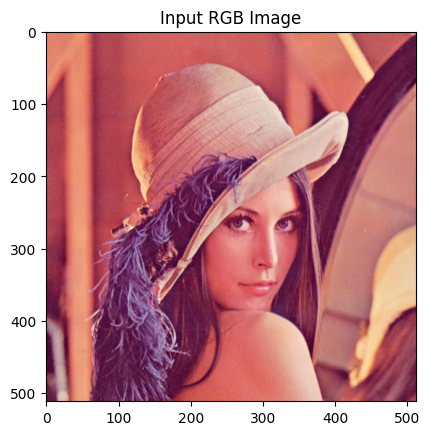

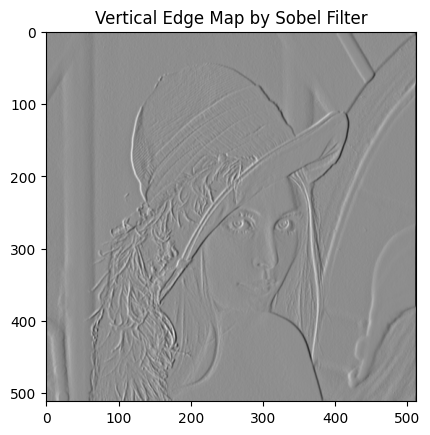

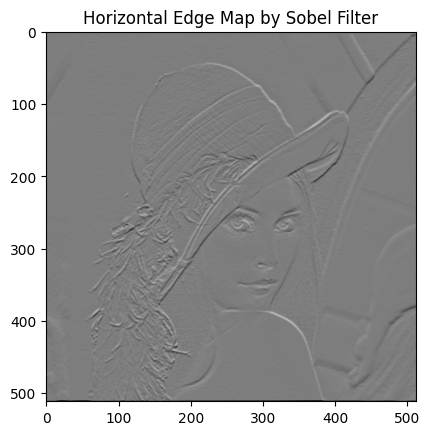

In [8]:
##############################################
#           Main Function for HW02-1         #
##############################################

img = loadImg('lenna.png')

filter_gx = edgeSobel_x()
filter_gy = edgeSobel_y()

out_sobel_x = conv(img, filter_gx)
out_sobel_y = conv(img, filter_gy)

plt.imshow(out_sobel_x, cmap='gray')
plt.title("Vertical Edge Map by Sobel Filter")
plt.show()

plt.imshow(out_sobel_y, cmap='gray')
plt.title("Horizontal Edge Map by Sobel Filter")
plt.show()

saveImg(out_sobel_x, 'Vertical edge map.png')
saveImg(out_sobel_y, 'Horizontal edge map.png')

## **[Homework II-2]** Implement the Gradient Magnitude and Directions

1. Calculate the magnitude of the gradient
2. Calculate the directions (angle) of the gradient

In [9]:
##############################################
#              Gradient Magnitude            #
##############################################
def magGrad(edge_x, edge_y):
  magnitude_grad = np.sqrt(edge_x * edge_x + edge_y * edge_y)
  
  return magnitude_grad


##############################################
#             Gradient Orientation           #
##############################################
def angleGrad(edge_x, edge_y):
  angle_grad = np.arctan2(edge_y, edge_x) * 180 / np.pi
  
  return angle_grad

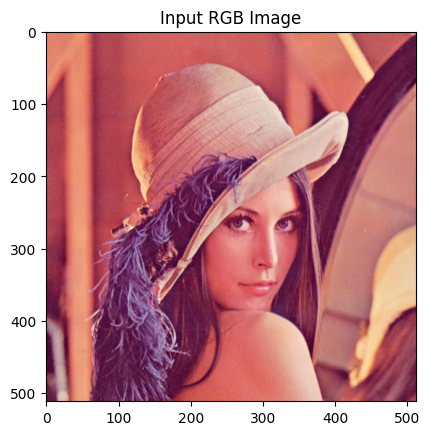

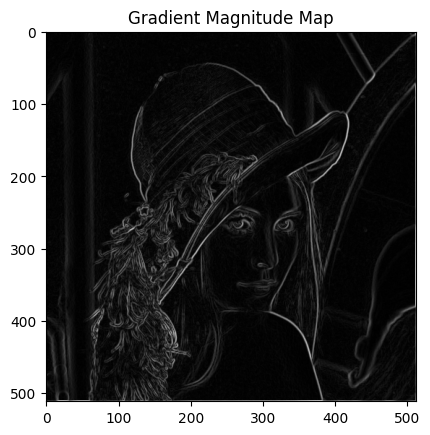

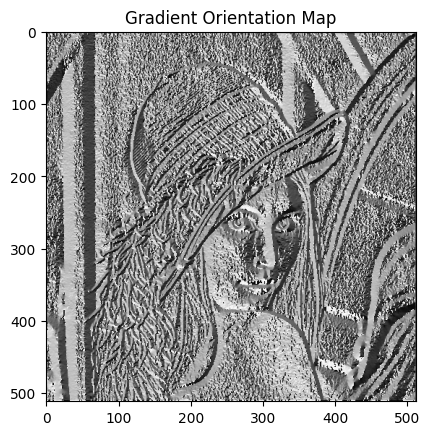

In [10]:
##############################################
#           Main Function for HW02-2         #
##############################################

img = loadImg('lenna.png')

filter_gx = edgeSobel_x()
filter_gy = edgeSobel_y()

out_sobel_x = conv(img, filter_gx)
out_sobel_y = conv(img, filter_gy)

# Magnitude of Gradient
out_magnitude_sobel = magGrad(out_sobel_x, out_sobel_y)

plt.imshow(out_magnitude_sobel, cmap='gray')
plt.title("Gradient Magnitude Map")
plt.show()


# Angle (Orientation) of Gradient
out_angle_sobel = angleGrad(out_sobel_y, out_sobel_x)

plt.imshow(out_angle_sobel, cmap='gray')
plt.title("Gradient Orientation Map")
plt.show()

saveImg(out_magnitude_sobel, 'Gradient magnitude map.png')
saveImg(out_angle_sobel,   'Gradient orientation map.png')